0-17       0
18-29     40
30-39    515
40-49    886
50-59    860
60-69    300
70-74     14
75+        0
Name: age_range, dtype: int64

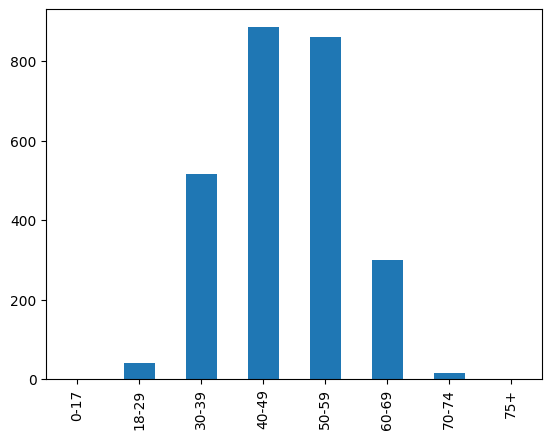

In [49]:
from os import getenv
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

database_url = getenv('DATABASE_URL')

sql = """
SELECT
    elemento.nome,
    funcionario.rg,
    funcionario."novoCPF" as cpf,
    funcionario."dataNascimento" as birth_date,
    funcionario.idade as current_age,

    cargo.sigla as cargo,
    classe.sigla as classe,

    departamento.sigla as departmento,
    designacao.sigla as designacao,
    exercicio.sigla as exercicio,
    setor.sigla as setor

FROM funcionarios_funcionario as funcionario
INNER JOIN funcionarios_elemento as elemento ON (funcionario.elemento_ptr_id = elemento.id)

INNER JOIN funcionarios_cargo as cargo ON (funcionario.cargo_id = cargo.id)
INNER JOIN funcionarios_classe as classe ON (funcionario.classe_id = classe.id)

LEFT OUTER JOIN funcionarios_departamento as departamento ON (funcionario.departamento_id = departamento.elemento_ptr_id)
LEFT OUTER JOIN funcionarios_elemento depto_elt ON (departamento.elemento_ptr_id = depto_elt.id)

LEFT OUTER JOIN funcionarios_designacao as designacao ON (funcionario.designacao_id = designacao.elemento_ptr_id)
LEFT OUTER JOIN funcionarios_elemento desig_elt ON (designacao.elemento_ptr_id = desig_elt.id)

LEFT OUTER JOIN funcionarios_exercicio as exercicio ON (funcionario.exercicio_id = exercicio.elemento_ptr_id)
LEFT OUTER JOIN funcionarios_elemento exerc_elt ON (exercicio.elemento_ptr_id = exerc_elt.id)

INNER JOIN funcionarios_setor as setor ON (funcionario.setor_id = setor.id)

ORDER BY elemento.nome ASC
"""

engine = create_engine(database_url)

df = pd.read_sql_query(sql, engine)

def age(born):
    # Convert to datetime if needed
    # born = datetime.strptime(born, "%d/%m/%Y").date()
    
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['birth_date'].apply(age)

# outdated_age = df[df['age'] != df['current_age']]
# outdated_age[['nome', 'age', 'current_age']]

age_ranges = [0, 18, 30, 40, 50, 60, 70, 75, np.inf]
age_names = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-74', '75+']

df['age_range'] = pd.cut(df['age'], bins = age_ranges, labels = age_names)

df['age_range'].value_counts(sort=False).plot(kind='bar')

df['age_range'].value_counts(sort=False)